## NAME - Hibah Mohammed Ghouse
## Z-ID- Z1945894

APPLIED MACHINE LEARNING ASSIGNMENT 5

1. Train a Random Forest Regressor for the dataset. Find the best model based on R-squared value using
RandomizedSearchCV

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.inspection import plot_partial_dependence



In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';', header = None)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4894,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6
4895,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5
4896,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
4897,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7


In [3]:
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df= df.drop(df.index[0])
print(df)

0    fixed acidity volatile acidity citric acid residual sugar chlorides  \
1                7             0.27        0.36           20.7     0.045   
2              6.3              0.3        0.34            1.6     0.049   
3              8.1             0.28         0.4            6.9      0.05   
4              7.2             0.23        0.32            8.5     0.058   
5              7.2             0.23        0.32            8.5     0.058   
...            ...              ...         ...            ...       ...   
4894           6.2             0.21        0.29            1.6     0.039   
4895           6.6             0.32        0.36              8     0.047   
4896           6.5             0.24        0.19            1.2     0.041   
4897           5.5             0.29         0.3            1.1     0.022   
4898             6             0.21        0.38            0.8      0.02   

0    free sulfur dioxide total sulfur dioxide  density    pH sulphates  \
1            

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rf = RandomForestRegressor(min_samples_leaf=5).fit(X_train, y_train)
print("Training Score:{:.3f}".format(rf.score(X_train, y_train)))
print("Testing Score:{:.3f}".format(rf.score(X_test, y_test)))

avg_cross_val = cross_val_score(rf, X_test, y_test, cv=5).mean()
print("Validation Score:{:.3f}".format(avg_cross_val))


Training Score:0.764
Testing Score:0.470
Validation Score:0.393


In [6]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [7]:
rs_model = RandomizedSearchCV(estimator=rf ,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2, # print out results
                            random_state=42, 
                            scoring="r2") # r2 score

# Fit the RandomizedSearchCV version of clf
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(min_samples_leaf=5),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, scoring='r2', verbose=2)

In [8]:
print("Training Score:{:.3f}".format(rs_model.score(X_train, y_train)))
print("Testing Score:{:.3f}".format(rs_model.score(X_test, y_test)))
avg_cross_val = cross_val_score(rs_model, X_test, y_test, cv=5).mean()
print("Validation Score:{:.3f}".format(avg_cross_val))


Training Score:0.931
Testing Score:0.523
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_sampl

## 2. Use the model from question 1 for model interpretation and rank the features based on permutation importance. 

Text(0.5, 0, 'Permutation Importance')

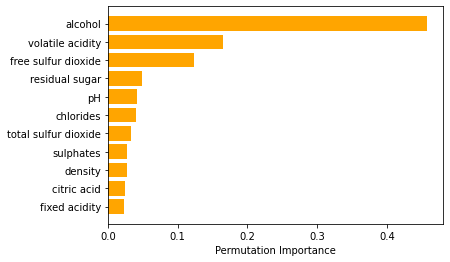

In [9]:
features = X_train.columns
p_importance = permutation_importance(rf, X_test, y_test)
s = p_importance.importances_mean.argsort()
plt.barh(features[s], p_importance.importances_mean[s], align='center', color ='orange')
plt.xlabel("Permutation Importance")

##3. Use the model from question 1 for model interpretation and interpret first sample from test data using SHAP Algorithm

In [10]:
!pip install shap

In [11]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

In [12]:
i = 1 
shap.force_plot(explainer.expected_value, shap_values[i], features=X.iloc[i], feature_names=X.columns)

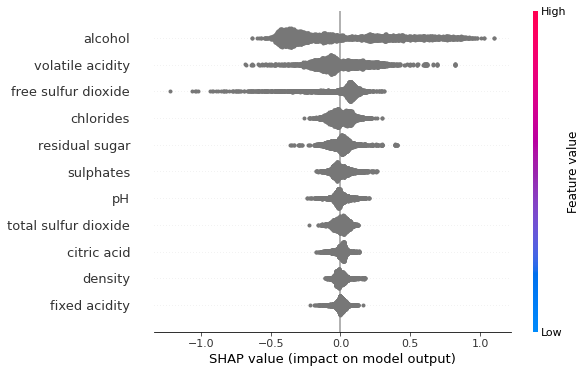

In [13]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

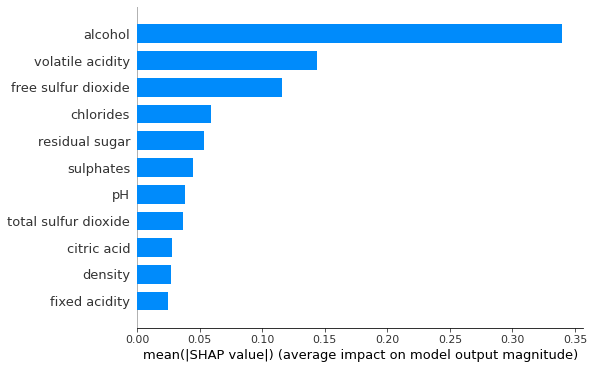

In [14]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')

## 4. Visualize partial dependence plot for each feature in the dataset using Sklearn.

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


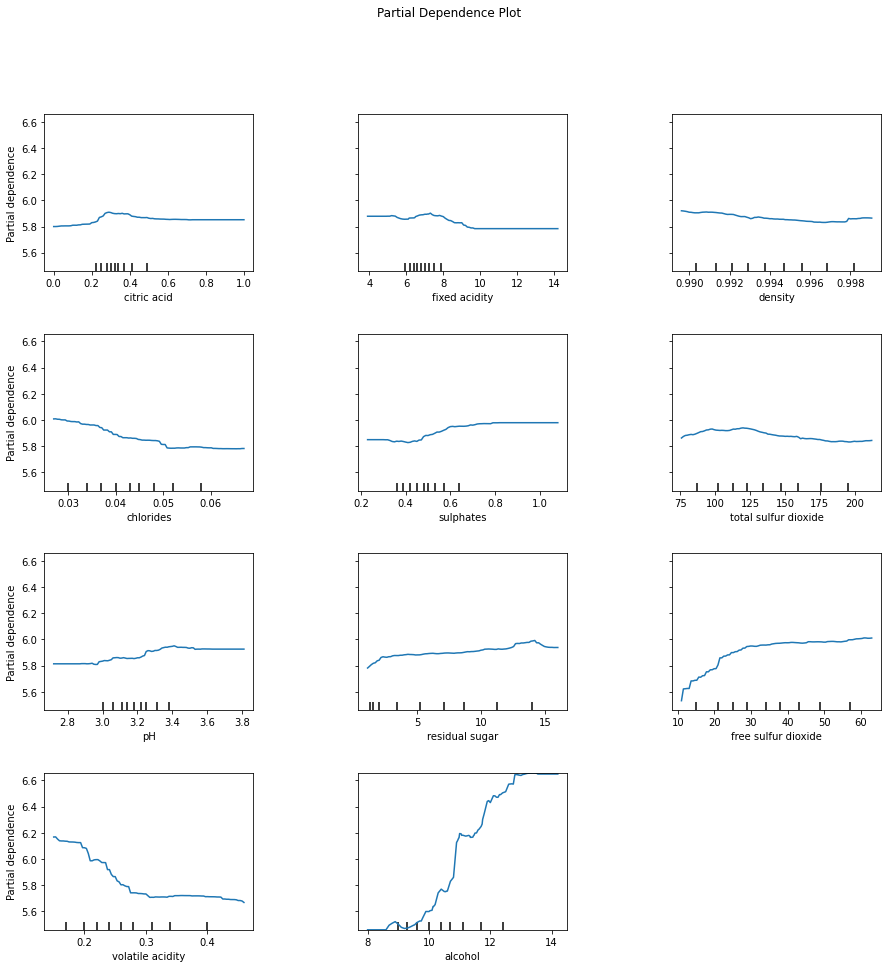

In [15]:
plot_partial_dependence(rf, X_train.astype('float'), np.argsort(rf.feature_importances_)[-11:], feature_names=X_train.columns)
fig= plt.gcf()
fig.set_size_inches(15, 15)
fig.suptitle('Partial Dependence Plot')
fig.subplots_adjust(wspace=0.5, hspace=0.4)

##5. Visualize ICE plot for each feature using Sklearn.

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


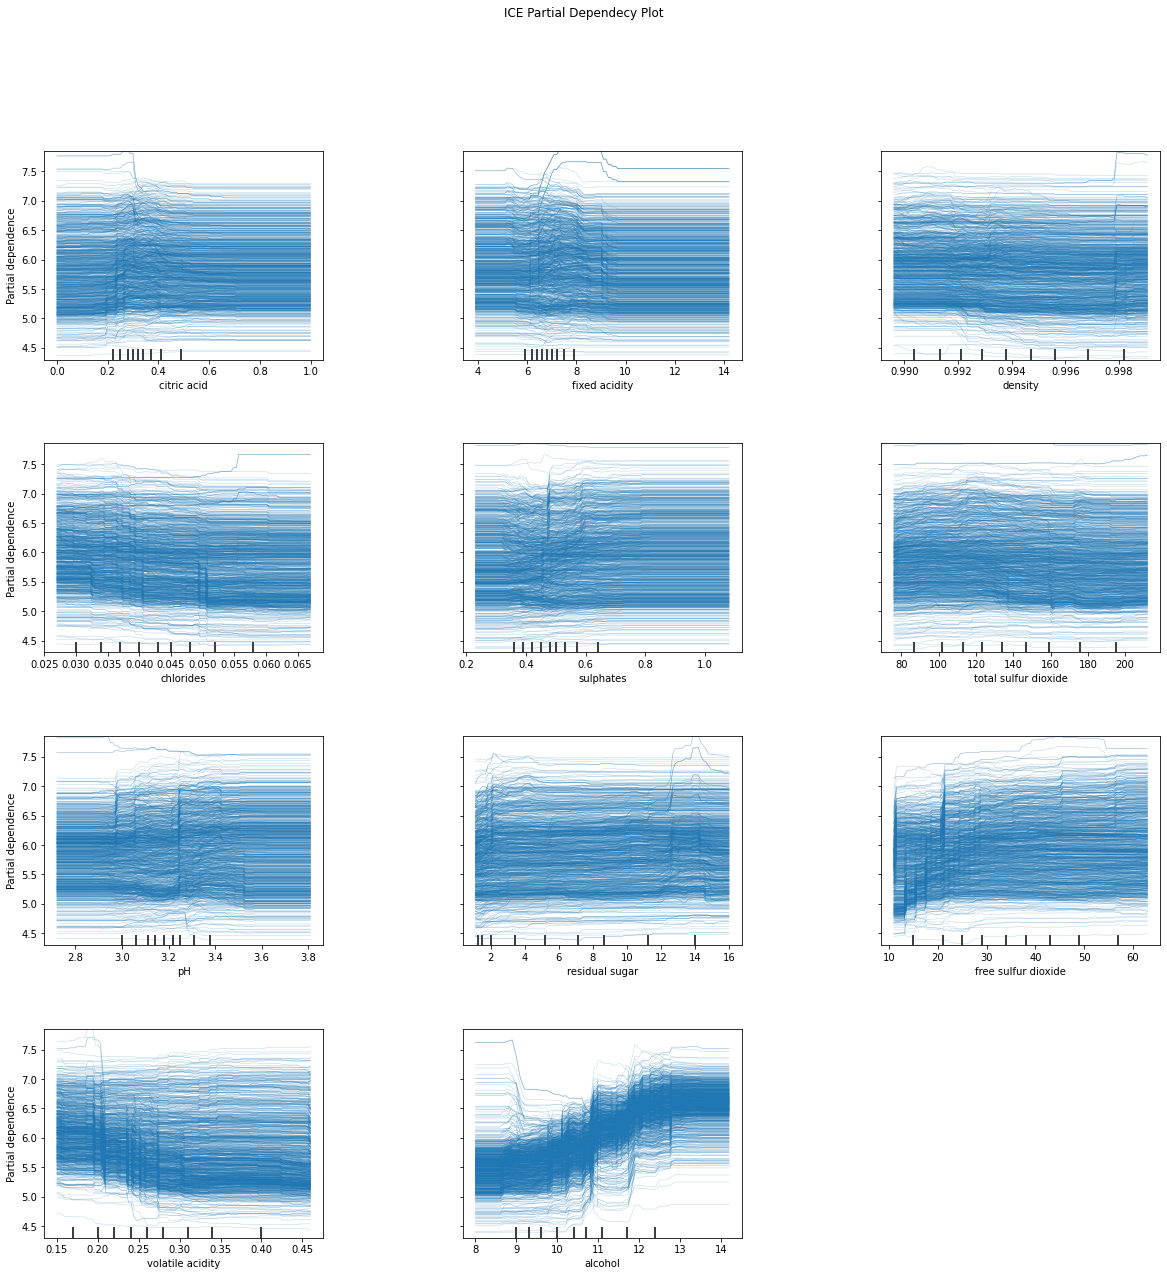

In [16]:
plot_partial_dependence(rf, X_train.astype('float'), np.argsort(rf.feature_importances_)[-11:],  kind='individual')
fig= plt.gcf()
fig.set_size_inches(20, 20)
fig.suptitle('ICE Partial Dependecy Plot')
fig.subplots_adjust(wspace=0.5, hspace=0.4)

##6. Write a brief report on which technique you found most useful and why.

Answer- 

For the first question the accuracy of training, testing and validation improved after applying RandomSearchCV to the train-test split. All other questions shows the model interpretation for the first question. In question 2, the permutation features that are important are plotted where alcohol outperforms all other features followed by volatile acidity. Shap algorithm shows how much each predictor contributes.  Traditional variable importance algorithms only show the results across the entire dataset but not on each individual case. Shap provides us with local interpretability by showing alcohold and volatile acidity having greater effect.
Question 4 shows the partial dependence plot which shows the marginal effect a feature can have on the predicted outcome. PH, sulphates, citric acid have lesser relation whereas alcohol has higher relation with graph reaching highest point.
ICE plot in the last question shows all the features seperately where density, chlorides have less relation whereas alcohol(10-13 has increase in quality aftr which it remains unchanged), volatile acidity(decreases after 0.20 point), citric acid mostly changes between 0.25-0.5, these values shows heterogenous relationto the predicted outcomes.

**************************************************************THE END********************************
